In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
train_df = pd.read_table("inputData/train.txt",sep=",")
test_df = pd.read_table("inputData/test.txt",sep=",")
combine = [train_df,test_df]

In [3]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


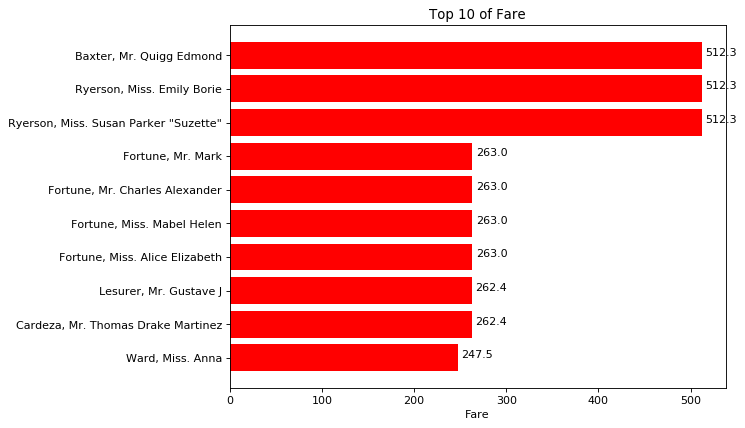

In [59]:
top10 = train_df.groupby("Name").sum().sort_values(by="Fare",ascending=False)[:10].reset_index()[["Name","Fare"]]
labels_length = np.arange(len(top10["Name"]))
values = top10["Fare"].round(1).sort_values()
labels = top10["Name"]
fig,ax = plt.subplots(figsize=(8,6),dpi=80)
ax.barh(labels_length,values,tick_label=labels,color="red")
ax.set(title="Top 10 of Fare",xlabel="Fare")
for a,b in zip(labels_length,values):
    ax.text(b+21,a,b,ha="center")

In [87]:
plt.rcParams["font.sans-serif"] = ["SimHei"]
plt.rcParams["axes.unicode_minus"] = False
df_grouped1 = train_df.groupby(["Pclass","Sex"])["Survived"].sum()


MultiIndex(levels=[[1, 2, 3], ['female', 'male']],
           labels=[[0, 1, 2], [0, 0, 0]],
           names=['Pclass', 'Sex'])

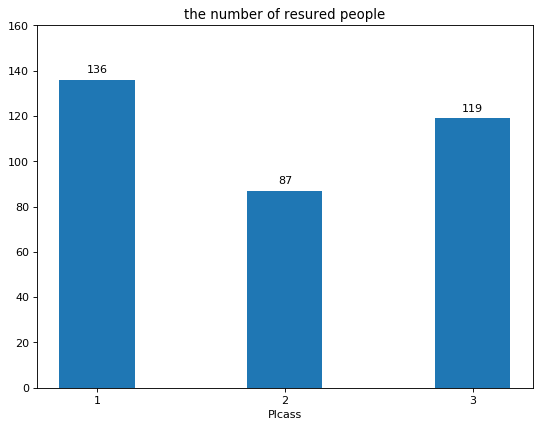

In [24]:
x = np.unique(train_df["Pclass"])
y = train_df.groupby("Pclass")["Survived"].sum()
fig,ax = plt.subplots(figsize=(8,6),dpi=80)
ax.bar(np.arange(len(x)),y,tick_label=x,width=0.4)
ax.set_xlabel("Plcass")
ax.set_title("the number of resured people")
ax.set_ylim(0,160)
for a,b in zip(np.arange(len(x)),y):
    ax.text(a,b+3,b,ha="center",fontsize=10)

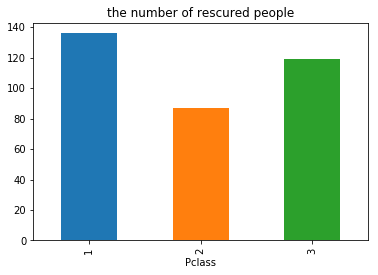

In [28]:
train_df.groupby("Pclass")["Survived"].sum().plot(kind="bar",title="the number of rescured people")

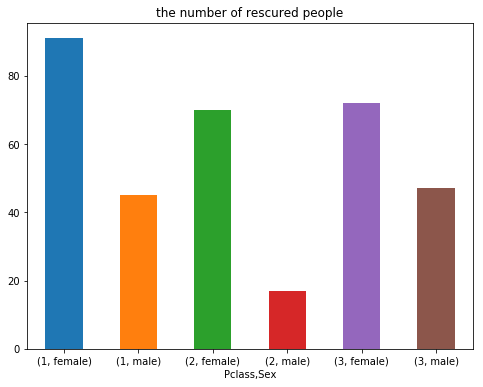

In [38]:
train_df.groupby(["Pclass","Sex"])["Survived"].sum().plot(kind="bar",rot=0,figsize=(8,6),title="the number of rescured people")

[]

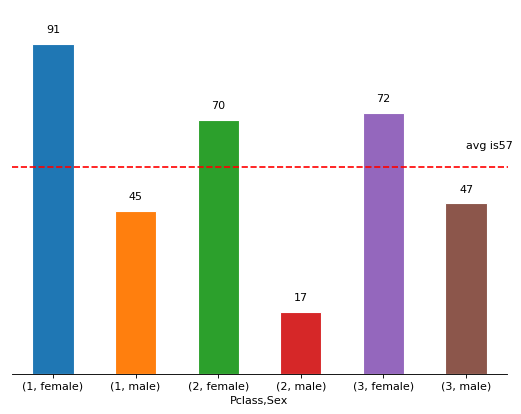

In [47]:
fig,ax = plt.subplots(figsize=(8,6),dpi=80)

df_ps = train_df.groupby(["Pclass","Sex"])["Survived"].sum()
df_ps.plot(kind="bar",rot=0,figsize=(8,6),ax=ax,edgecolor="w")
ax.set_title = "the number of rescured people"
for a,b in zip(np.arange(len(df_ps.values)),df_ps.values):
    ax.text(a,b+3,b,ha="center")
ax.set_ylim(0,100)

avg = train_df["Survived"].sum() / 6
ax.axhline(y=avg,color="red",linestyle="--")
ax.text(5,avg+5,"avg is" +str(int(avg)))

ax.spines["left"].set_color("none") 
ax.spines["right"].set_color("none")
ax.spines["top"].set_color("none")
ax.set_yticks([])

In [4]:
train_df.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

In [5]:
train_df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [7]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
train_df[["Pclass","Survived"]].groupby("Pclass",as_index=False).mean()

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [9]:
train_df[["Sex","Survived"]].groupby("Sex",as_index=False).mean()

,Sex,Survived
0,female,0.742038
1,male,0.188908


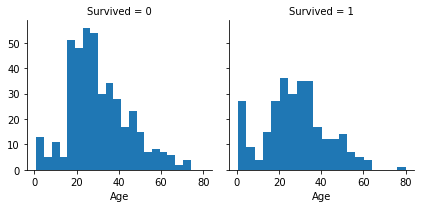

In [10]:
g = sns.FacetGrid(train_df,col="Survived")
g.map(plt.hist,"Age",bins=20)

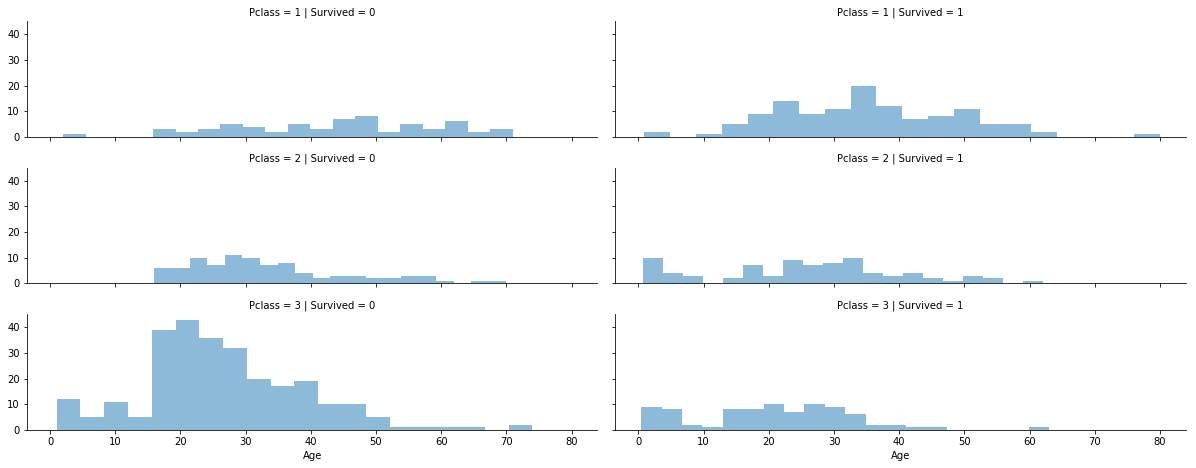

In [11]:
grid = sns.FacetGrid(train_df,col="Survived",row="Pclass",size=2.2,aspect=3.8)
grid.map(plt.hist,"Age",alpha=0.5,bins=20)

D:\Anaconda\lib\site-packages\seaborn\axisgrid.py:703: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


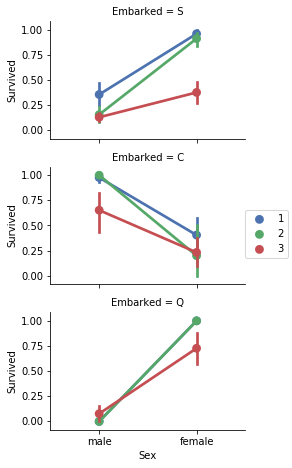

In [12]:
grid = sns.FacetGrid(train_df,row="Embarked",size=2.2,aspect=1.6)
grid.map(sns.pointplot,"Sex","Survived","Pclass",palette="deep",hue_order=[1,2,3])
grid.add_legend()

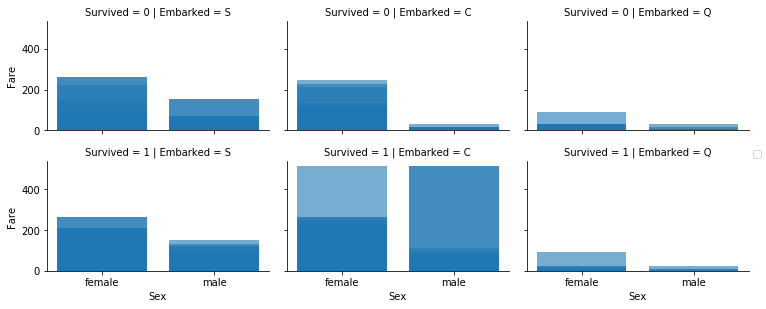

In [13]:
grid = sns.FacetGrid(train_df,col="Embarked",row="Survived",size=2.2,aspect=1.6)
grid.map(plt.bar,"Sex","Fare",alpha=0.6)
grid.add_legend()

In [14]:
train_df = train_df.drop(["Cabin","Ticket"],axis=1)
test_df = test_df.drop(["Cabin","Ticket"],axis=1)
combine = [train_df,test_df]

In [15]:
for dataset in combine:
    dataset["Title"] = dataset.Name.str.extract("([A-Za-z]+)\.")
test_crostab = pd.crosstab(train_df["Title"],train_df["Sex"])

In [16]:
test_crostab

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [17]:
for dataset in combine:
    dataset["Title"] = dataset["Title"].replace(["Lady","Capt","Countess","Don","Jonkheer","Dr","Col","Major","Rev","Sir"],"Rare")
    dataset["Title"] = dataset["Title"].replace(["Mlle","Ms"],"Miss")
    dataset["Title"] = dataset["Title"].replace("Mme","Mrs")
train_df[["Title","Survived"]].groupby("Title",as_index=False).mean().sort_values("Survived",ascending=False)
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,Mr


In [18]:
titlemapping = {"Mrs":3,"Mr":1,"Miss":2,"Master":4,"Rare":5}
for dataset in  combine:
    dataset["Title"] = dataset["Title"].map(titlemapping)
    dataset["Title"] = dataset["Title"].fillna(0)
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1


In [19]:
train_df = train_df.drop(["PassengerId","Name"],axis=1)
test_df = test_df.drop(["PassengerId","Name"],axis=1)
combine = [train_df,test_df]

In [20]:
for dataset in combine:
    dataset["Sex"] = dataset["Sex"].map({"female":0,"male":1})

In [21]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,1,22.0,1,0,7.2500,S,1
1,1,1,0,38.0,1,0,71.2833,C,3
2,1,3,0,26.0,0,0,7.9250,S,2
3,1,1,0,35.0,1,0,53.1000,S,3
4,0,3,1,35.0,0,0,8.0500,S,1


In [23]:
import numpy as np
guess_ages = np.zeros((2,3))
for dataset in combine:
    for i in range(0, 2):
        for j in range(0, 3):
            guess_df = dataset[(dataset['Sex'] == i) & \
                                  (dataset['Pclass'] == j+1)]['Age'].dropna()

            # age_mean = guess_df.mean()
            # age_std = guess_df.std()
            # age_guess = rnd.uniform(age_mean - age_std, age_mean + age_std)

            age_guess = guess_df.median()

            # Convert random age float to nearest .5 age
            guess_ages[i,j] = int( age_guess/0.5 + 0.5 ) * 0.5
            
    for i in range(0, 2):
        for j in range(0, 3):
            dataset.loc[ (dataset.Age.isnull()) & (dataset.Sex == i) & (dataset.Pclass == j+1),\
                    'Age'] = guess_ages[i,j]

    dataset['Age'] = dataset['Age'].astype(int)

train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,1,22,1,0,7.2500,S,1
1,1,1,0,38,1,0,71.2833,C,3
2,1,3,0,26,0,0,7.9250,S,2
3,1,1,0,35,1,0,53.1000,S,3
4,0,3,1,35,0,0,8.0500,S,1


In [24]:
train_df['AgeBand'] = pd.cut(train_df['Age'], 5)
train_df[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)

,AgeBand,Survived
0,"(-0.08, 16.0]",0.550000
1,"(16.0, 32.0]",0.337374
2,"(32.0, 48.0]",0.412037
3,"(48.0, 64.0]",0.434783
4,"(64.0, 80.0]",0.090909


In [25]:
for dataset in combine:    
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age'] = 4
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeBand
0,0,3,1,1,1,0,7.2500,S,1,"(16.0, 32.0]"
1,1,1,0,2,1,0,71.2833,C,3,"(32.0, 48.0]"
2,1,3,0,1,0,0,7.9250,S,2,"(16.0, 32.0]"
3,1,1,0,2,1,0,53.1000,S,3,"(32.0, 48.0]"
4,0,3,1,2,0,0,8.0500,S,1,"(32.0, 48.0]"


In [26]:
train_df = train_df.drop(['AgeBand'], axis=1)
combine = [train_df, test_df]
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,1,1,1,0,7.2500,S,1
1,1,1,0,2,1,0,71.2833,C,3
2,1,3,0,1,0,0,7.9250,S,2
3,1,1,0,2,1,0,53.1000,S,3
4,0,3,1,2,0,0,8.0500,S,1


In [27]:
for dataset in combine:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1
for dataset in combine:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1

In [28]:
train_df = train_df.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
test_df = test_df.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
combine = [train_df, test_df]

In [32]:
for dataset in combine:
    dataset["Age*Pclass"] = dataset["Pclass"] * dataset["Age"]
train_df.loc[:,["Class","Age","Age*Pclass"]].head()

,Class,Age,Age*Pclass
0,NaN,1,3
1,NaN,2,2
2,NaN,1,3
3,NaN,2,2
4,NaN,2,6
